In [28]:
import numpy as np
import matplotlib.pyplot as plt
from training_algo import proj_GD_Polyak, NCGD_Polyak
from projection import proj_unit_sphere,proj_unit_normal

In [29]:
def quadr(x):
    resi = np.dot(A,x)
    val = 0.5*np.dot(x,resi)-np.dot(x,b)
    grad = resi-b
    return val,grad

In [30]:
n = 100
c = np.random.randn(n)
#idx = np.random.choice(n,n%4,replace=False)
#c[idx]=0
c = proj_unit_sphere(c)
eg = np.random.rand(n)
A = np.diag(eg)
A = A@A.T
b = A@c
func = quadr

In [31]:
xx,_ = quadr(c)
print(xx)

-0.19074432650360829


In [32]:
x0 = np.random.randn(n)
x0 = proj_unit_sphere(x0)
res1,grad1,stepGD,_ = proj_GD_Polyak(func,proj_unit_sphere,proj_unit_normal,x0,1000,xx)
res2,grad2,stepNC,_ = NCGD_Polyak(func,proj_unit_sphere,proj_unit_normal,x0,1000,xx)

In [33]:
res1 = res1-xx
res2 = res2 - xx

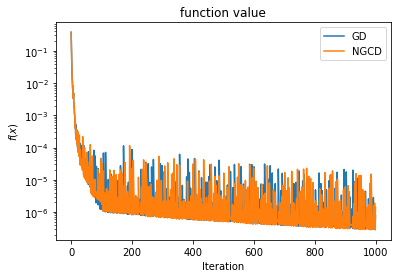

In [34]:

labels = ['GD','NCGD']
markers = ['*', 'o']

plt.plot(res1,label='GD')
plt.plot(res2,label='NGCD')
plt.yscale('log')
plt.xlabel(u'Iteration')
plt.ylabel(r'$f(x)$')
plt.title('function value')
plt.legend()

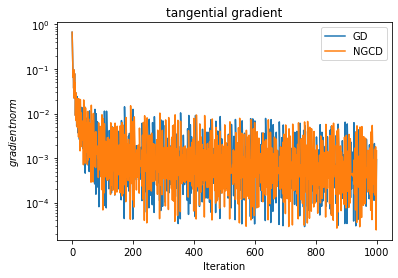

In [35]:

labels = ['GD','NCGD']
markers = ['*', 'o']

plt.plot(grad1,label='GD')
plt.plot(grad2,label='NGCD')
plt.yscale('log')
plt.xlabel(u'Iteration')
plt.ylabel(r'$gradient norm$')
plt.title('tangential gradient')
plt.legend()

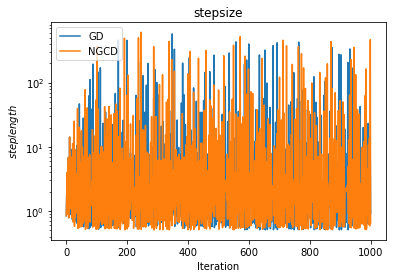

In [36]:
labels = ['GD','NCGD']
markers = ['*', 'o']

plt.plot(stepGD,label='GD')
plt.plot(stepNC,label='NGCD')
plt.yscale('log')
plt.xlabel(u'Iteration')
plt.ylabel(r'$step length$')
plt.title('stepsize')
plt.legend()